Autor: Vallecillo Ignacio Manuel

#**Importamos las librerias y el dataset**

In [ ]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_stroke = pd.read_csv("https://drive.google.com/uc?export=download&id=1-Qx5RcNPFwViqibTQFEsior_6UOm0O4K")

# **Descripcion del dataset**

In [ ]:
data_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


**Diccionario de Variables**


1.   **gender**: "Male", "Female" or "Other"
2.   **age**: age of the patient
3. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4. **heartdisease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) evermarried: "No" or "Yes"
5. **worktype**: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
6. **Residencetype**: "Rural" or "Urban"
7. **avgglucoselevel**: average glucose level in blood
8. **bmi**: body mass index
9. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
10. **stroke**: 1 if the patient had a stroke or 0 if not

**Note**: "Unknown" in **smoking_status** means that the information is unavailable for this patient

In [ ]:
#Shape
print(data_stroke.shape)

(4981, 11)


In [ ]:
data_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
# Tipos de datos
data_stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#Vemos si tenemos missings
data_stroke.count()

gender               4981
age                  4981
hypertension         4981
heart_disease        4981
ever_married         4981
work_type            4981
Residence_type       4981
avg_glucose_level    4981
bmi                  4981
smoking_status       4981
stroke               4981
dtype: int64

#**Preprocesamiento de los datos**


##Convertimos a las variables en dummies!

In [ ]:
df_dum_stroke = pd.get_dummies(data_stroke, drop_first=True)
df_dum_stroke.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,1,0,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,1,1,0,0,1,0,0,1
3,79.0,1,0,174.12,24.0,1,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,1,1,0,0,1,1,0,0


## Veamos que cantidad de pacientes han sufrido un Derrame cerebral (Stroke)

In [ ]:
strokes = df_dum_stroke.stroke.value_counts()
print(f'La cantidad de pacientes que han presentado un derrame cerebral segun el dataset es: {strokes[1]}')

La cantidad de pacientes que han presentado un derrame cerebral segun el dataset es: 248


# Balancear el dataset para mejorar las clasificaciones. Metodos a utilizar: **SMOTE** Synthetic Minority Over-sampling Technique y  the **class_weight** parameter in scikit-learn's Logistic Regression

##Separamos los datos de entrada de la salida

In [ ]:
X = df_dum_stroke.drop('stroke', axis=1) 
y = df_dum_stroke.stroke 

# **Aplicacion de algorimos de Clasificacion**

# **Experimento 1**

##Separamos los datos en Train y Test (test_size=0.3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Preparamos los modelos

In [ ]:
#Arbol de decision 
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) 
#Random Forest
random_tree = RandomForestClassifier(random_state=11, n_estimators=200, class_weight="balanced", max_features="log2")
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
# SVC
svc = SVC(C = 100, kernel = 'linear', random_state=123)

## Entrenamos los modelos 

In [ ]:
models_acc = []
modelos = [tree, random_tree, knn, svc]
for model in modelos:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))

##Resultados

In [ ]:
resultados = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'SVC']
})
resultados

,Model Accuracy,Model Name
0,0.947826,DecisionTreeClassifier
1,0.947157,RandomForestClassifier
2,0.940468,KNeighborsClassifier
3,0.947826,SVC


## **Comparativa de los resultados obtenidos**

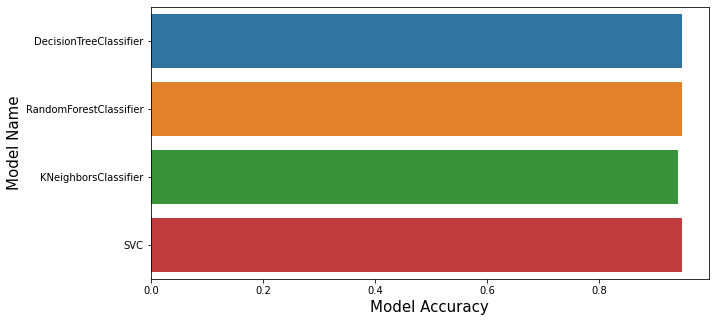

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(resultados['Model Accuracy'], resultados['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);

## **Conclusion:** Vemos como **DecisionTreeClassifier** y **SVC** comparten el mismo score de acertividad estando por encima del modelo **RandomForestClassifier** y aun mas abajo **KNeighborsClassifier**

# **Experimento 2**

##Separamos los datos en Train y Test (test_size=0.25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Preparamos los modelos

Modificamos paramentros con respecto al experimento anterior






In [ ]:
#Arbol de decision 
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) 
#Random Forest
random_tree = RandomForestClassifier(random_state=11, n_estimators=300, class_weight="balanced", max_features="log2")
# KNN
knn = KNeighborsClassifier(n_neighbors=4)
# SVC
svc = SVC(C = 100, kernel = 'linear', random_state=42)

## Entrenamos los modelos 

In [ ]:
models_acc = []
modelos = [tree, random_tree, knn, svc]
for model in modelos:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))

##Resultados

In [ ]:
resultados = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'SVC']
})
resultados

,Model Accuracy,Model Name
0,0.944623,DecisionTreeClassifier
1,0.941413,RandomForestClassifier
2,0.944623,KNeighborsClassifier
3,0.944623,SVC


## **Comparativa de los resultados obtenidos**

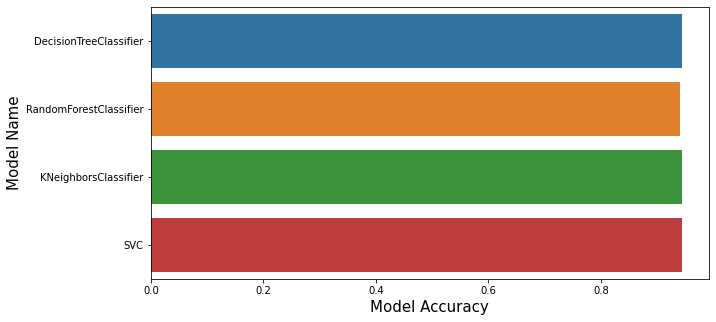

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(resultados['Model Accuracy'], resultados['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);

##Conclusion: Podemos observar como se iguala la acertividad de los modelos **DecisionTreeClassifier**, **KNeighborsClassifier** y **SVC**, mientras que el modelo **RandomForestClassifier** se encuentra 0.0032 de acertividad por debajo.